## Recognizing faces of friends

In [46]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
import os


In [3]:
img_width, img_height = 64, 64

train_data_dir = 'images/train images'
test_data_dir = 'images/valid images'
nb_train_samples = 1578
nb_valid_samples = 30
image_channel = 1
batch_size = 20
epochs = 5

In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (image_channel, img_width, img_width)
else:
    input_shape = (img_width, img_height, image_channel)


train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

valid_datagen = ImageDataGenerator(
    rescale = 1. /255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    color_mode = "grayscale",
    batch_size = batch_size,
    class_mode = 'categorical')


valid_generator = valid_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_width, img_height),
    color_mode = "grayscale",
    batch_size = batch_size,
    class_mode = 'categorical')

Found 1578 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#model.summary()

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
__________

In [8]:
model.fit_generator(train_generator,
                   steps_per_epoch = nb_train_samples // batch_size,
                   epochs = epochs,
                   validation_data = valid_generator,
                   validation_steps = nb_valid_samples // batch_size)

Epoch 1/5
78/78 [==============================] - 129s 2s/step - loss: 0.5930 - acc: 0.7636 - val_loss: 0.4462 - val_acc: 0.8000
Epoch 2/5
78/78 [==============================] - 97s 1s/step - loss: 0.3774 - acc: 0.8671 - val_loss: 0.1310 - val_acc: 0.9500
Epoch 3/5
78/78 [==============================] - 128s 2s/step - loss: 0.2920 - acc: 0.8887 - val_loss: 0.1483 - val_acc: 0.9000
Epoch 4/5
78/78 [==============================] - 69s 881ms/step - loss: 0.2187 - acc: 0.9178 - val_loss: 0.0792 - val_acc: 0.9500
Epoch 5/5
78/78 [==============================] - 68s 874ms/step - loss: 0.1852 - acc: 0.9320 - val_loss: 0.0021 - val_acc: 1.0000


In [9]:
model.save_weights('first_try.h5')

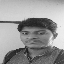

Sir Chaitu


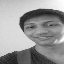

Rudra


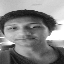

Rudra


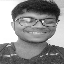

Anish


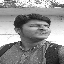

Sir Chaitu


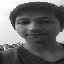

Rudra


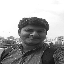

Sir Chaitu


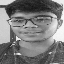

Anish


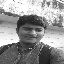

Sir Chaitu


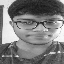

Anish


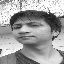

Rudra


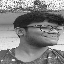

Anish


In [49]:
test_path = 'images/test images/'

for img_path in os.listdir(test_path):

    img_pred_pil=image.load_img( test_path + img_path, target_size=(64,64), color_mode='grayscale')

    display(img_pred_pil)

    img_pred_nparr = image.img_to_array(img_pred_pil)
    img_pred_nparr = np.expand_dims(img_pred_nparr,axis = 0)

    rslt = model.predict_classes(img_pred_nparr)

    if rslt == 0:
        print('Anish')
    elif rslt == 1:
        print('Sir Chaitu')
    else:
        print('Rudra')
